## Getting data

First, we will need to examine the data provided for the project. We start by importing `pandas` library for reading a csv-file into a DataFrame to be stored in `data` variable.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting visual theme for plots
sns.set_theme(style="white")

Now, let's save the dataset contained in `bank_clients_data.csv` into a separate variable.

In [2]:
data = pd.read_csv("bank_clients_data.csv")

Print the first 20 rows of the DataFrame in order to see what the data looks like.

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


We can explore the data further by considering the summary information about the DataFrame.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Let's inspect what information the dataset contains:

1. The DataFrame has twelve columns, which have numeric and categorical values (`float64`, `int64` and `object`). 

2. `data` contains information about the clients of the bank with the following features:

    * `children` - number of children in a family;
    * `days_employed` - total number of days being employed;
    * `dob_years` - client's age;
    * `education` - client's education level;
    * `education_id` - education level identifier;
    * `family_status` - client's family status;
    * `family_status_id` - family status identifier;
    * `gender` - client's gender;
    * `income_type` - type of employment;
    * `debt` - indicator of owing a debt to the bank;
    * `total_income` - monthly income;
    * `purpose` - purpose of taking out a loan.
3. The number of non-null values is not the same across columns, signifying the fact that the data has missing values.

**Conclusion**

The dataset contains information about borrowers of the bank with numerous attributes, where each row identifies a separate debtor with specific data. The DataFrame is seen to have missing values present as well as potential data format problems, all of which warrant data preprocessing being carried out.

## Data preprocessing

### Missing values

Let's determine the number of missing values in the dataset.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

We see that there are two columns that contain missing values: `days_employed` and `total_income`. Deal first with the latter column. In order to get rid of missing values, we need to understand what the variable represents. `total_income` stores information about clients' incomes, meaning that the column possesses numeric values. Income is dependent upon type of employment shown in `income_type` and therefore we can fill in missing values with median income relative to a particular employment type.

In [6]:
# Filling in missing values with median in 'total_income' column depending on 'income_type'
for inc_type in data["income_type"].unique():
    data.loc[
        (data["income_type"] == inc_type) & (data["total_income"].isna()),
        "total_income",
    ] = data.loc[(data["income_type"] == inc_type), "total_income"].median()

### Abnormalities

As can be seen from the data, we have abnormal values found in `days_employed` column: by no means can duration of employment be negative. Thus, we are dealing with abnormalities in the data. We can easily fix this by taking the absolute value of each data point in this column.

In [7]:
# Converting the data to a correct format
data["days_employed"] = data["days_employed"].abs()

Let's further explore this column and display median employment duration in relation to employment type.

In [8]:
# Displaying median values
(data.groupby("income_type")["days_employed"].agg("median"))

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

We see that some income types, specifically, unemployed (`безработный`) and retired (`пенсионер`) have unusually high values. It is difficult to deal with this kind of abnormalities and since this column will be very informative to use in the subsequent analysis, we just leave the data as it is here.

Now, display the possible unique numbers of children that borrowers have.

In [9]:
data["children"].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

It is clearly seen that there are two impossible values: 20 and -1. Let's get rid of them.

In [10]:
# Getting rid of abnormal values
data = data[(data["children"] != -1) & (data["children"] != 20)]
data["children"].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Missing values (cont.)

Now we can fill in missing values in `days_employed` column with their median values depending on income type.

In [11]:
# Filling in missing values with median in 'days_employed' column depending on 'income_type'
for inc_type in data["income_type"].unique():
    data.loc[
        (data["income_type"] == inc_type) & (data["days_employed"].isna()),
        "days_employed",
    ] = data.loc[(data["income_type"] == inc_type), "days_employed"].median()

We can verify whether we have completely dealt with missing values issue.

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Data type changes

Let's change the data in `total_income` column from `float64` to `int64` for convenience. 

In [13]:
data["total_income"] = data["total_income"].astype("int64")

### Duplicates

We have some implicit duplicates in `education` column, specifically, using both capital and small letters to write down the same education level. Thus, let's convert all values in this column to strings with lowercase letters.

In [14]:
data["education"] = data["education"].str.lower()

Now, we can take a look how many explicit duplicates (identical DataFrame rows) we have.

In [15]:
# Computing the number of exact duplicates
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Data categorization

To make further data analysis more convenient, let's create a categorical variable that will classify clients' incomes (in roubles) according to the following ranges:

* 0-30,000 => `'E'`
* 30,001-50,000 => `'D'`
* 50,001-200,000 => `'C'`
* 200,001-1,000,000 => `'B'`
* 1,000,001 and higher => `'A'`

For instance, a borrower with monthly income of, say, 200500 roubles will be put in `'B'` income category. We can easily program such a categorization by using `cut()` function of `pandas` library in order to be able to categorize the data in `total_income` column in accordance with ranges and income group identifiers defined above.

In [17]:
# Classifying into income groups
data["total_income_category"] = pd.cut(
    data["total_income"],
    bins=[0, 30000, 50000, 200000, 1000000, max(data["total_income"])],
    labels=["E", "D", "C", "B", "A"],
)

data["total_income_category"] = data["total_income_category"].astype("object")

Next, consider possible purposes that clients taking out loans may have.

In [18]:
# Printing unique purposes of taking a loan
data["purpose"].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

We can see that it seems that there are lost of reasons for taking out loans in a bank, including real estate (`жилье`), buying a car (`автомобиль`), wedding (`свадьба`) and education (`образование`). But, in fact, all these purposes are simply written differently but actually refer to similar things. Hence, it is possible to also classify all these reasons into purpose categories:

* `'операции с автомобилем'` => buying a car
* `'операции с недвижимостью'` => real estate
* `'проведение свадьбы'` => wedding
* `'получение образования'` => education

In order to accomplish this, we can create `categorize_purpose()` function and use `apply()` method on it.

In [19]:
def categorize_purpose(row: str) -> str:
    """Classify people into loan purpose categories depending on loan purpose.

    Arguments:
    row (str) -- purpose of taking out a loan
    """
    try:
        if "автом" in row:
            return "операции с автомобилем"
        elif "жил" in row or "недвиж" in row:
            return "операции с недвижимостью"
        elif "свад" in row:
            return "проведение свадьбы"
        elif "образов" in row:
            return "получение образования"
    except:
        return "нет категории"

In [20]:
# Applying the function to the DataFrame column
data["purpose_category"] = data["purpose"].apply(categorize_purpose)

**Conclusion**

We have managed to properly preprocess data by dealing with missing and abnormal values, changing the format of data and deleting duplicates, both expicit and implicit. 

Omissions in the source data were recorded in the columns `days_employed` and `total_income`. One possible reason for missing data may be the failure of an automated system for collecting information about borrowers. For example, when a borrower specifies information about themselves in a form on a website and does not specify some information, the website may not notice this and simply send the information further (if the programmer forgot to make some cells mandatory). Another reason may be a purely human factor: if a borrower comes to the bank and tells the bank employee information about themselves, an employee may simply make a mistake in something and forget to specify the data, which will result in the appearance of `NaN` values in the data.

Besides, we have managed to fill in missing values by using a median. As a rule, there are "outliers" in quantitative variables - values that are very different from other values in a particular column. The use of average values can distort the data in this case and in order to avoid this, a median is used, which will take into account such sharply distinguished values and will not exaggerate the estimate of the missing value.

Next step is to actually start conducting creditworthiness analysis itself.

## Solvency determinants analysis

Now that the data has been preprocessed, we can get to analyzing possible factors that determine the ability of bank's clients to repay a loan on time. We will conduct the analysis by considering multiple features, such as the number of children, family status, total income and purpose of a loan, for which we will compute some descriptive statistics about the borrowers. In order not to repeat the code over and over again, let's define `show_solvency()` that will calculate the number of borrowers, including those in debt and those who repaid the loan, as well as the share of people who do not have debt, depending on a specific feature of the bank clients. 

In [21]:
def show_solvency(
    feature: str, add_extra: bool = False, data: pd.DataFrame = data
) -> pd.DataFrame:
    """Display solvency statistics for borrowers by feature.

    Arguments:
    feature (str) -- the characteristic of borrowers

    Keyword arguments:
    add_extra (bool) -- indicator of adding extra information (default False)
    data (pd.DataFrame) -- bank clients data (default data)
    """
    data_grouped = data.groupby(feature).agg({"debt": ["count", "sum"]})

    # Number of borrowers who managed to repay on time
    data_grouped["no_debt"] = (
        data_grouped["debt"]["count"] - data_grouped["debt"]["sum"]
    )

    # Computing debt repayment ratio
    data_grouped["no_debt_share"] = round(
        data_grouped["no_debt"] / data_grouped["debt"]["count"], 4
    )

    # Getting rid of multiindex
    data_grouped.columns = [
        "total_borrowers",
        "has_debt",
        "no_debt",
        "repay_ratio",
    ]

    # Adding additional information
    if add_extra:
        if feature == "family_status":
            data_grouped["family_status_eng"] = [
                "not married",
                "divorced",
                "widower/widow",
                "civil marriage",
                "married",
            ]
            # Rearranging columns order
            data_grouped = data_grouped[
                data_grouped.columns[:-1].insert(0, data_grouped.columns[-1])
            ]
        elif feature == "total_income_category":
            data_grouped["income_range"] = [
                ">1,000,000",
                "200,001-1,000,000",
                "50,001-200,000",
                "30,001-50,000",
                "0-30,000",
            ]
            data_grouped = data_grouped[
                data_grouped.columns[:-1].insert(0, data_grouped.columns[-1])
            ]
        elif feature == "purpose_category":
            data_grouped["purpose_category_eng"] = [
                "car",
                "real estate",
                "education",
                "wedding",
            ]
            data_grouped = data_grouped[
                data_grouped.columns[:-1].insert(0, data_grouped.columns[-1])
            ]
        else:
            pass
    else:
        pass

    solvency_info = data_grouped

    return solvency_info

Since reading statistics in a DataFrame may sometimes be inconvenient, let's add visualization part here as well. Hence, we define `plot_solvency()` function that will create a set of subplots for each category of a specific feature.

In [22]:
def plot_solvency(feature: str, data: pd.DataFrame = data):
    """Make subplots for each unique value of a feature.

    Arguments:
    feature (str) -- the characteristic of borrowers

    Keyword arguments:
    data (pd.DataFrame) -- bank clients data (default data)
    """
    fig, axes = plt.subplots(
        1, len(data[feature].unique()), figsize=(5 * len(data[feature].unique()), 5)
    )
    fig.suptitle(f"Solvency of clients by {feature}")
    for val, ax in zip(data[feature].sort_values().unique(), axes):
        dt = data.loc[data[feature] == val]
        # Computing debt repayment ratio
        repay = (sum(1 - dt["debt"])) / len(dt["debt"])
        # Plotting
        figure = sns.countplot(data=dt, x=feature, hue="debt", ax=ax)
        figure.legend(["Repaid", "In debt"])
        figure.set(ylabel="Number of borrowers", title=f"Repayment rate = {repay:.2%}")
    plt.tight_layout()

### Number of children

In [23]:
# Computing the number of borrowers in each children group
data["children"].value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

To begin with, let's calculate the total number of borrowers by the number of children using `value_counts()` method in the `children` column. It can be seen that the number of borrowers broken down by each group varies quite widely, which suggests that people with a large number of children do not take out loans so often.

In [24]:
solvency_children = show_solvency(feature="children")
solvency_children

,total_borrowers,has_debt,no_debt,repay_ratio
children,,,,
0,14091,1063,13028,0.9246
1,4808,444,4364,0.9077
2,2052,194,1858,0.9055
3,330,27,303,0.9182
4,41,4,37,0.9024
5,9,0,9,1.0000


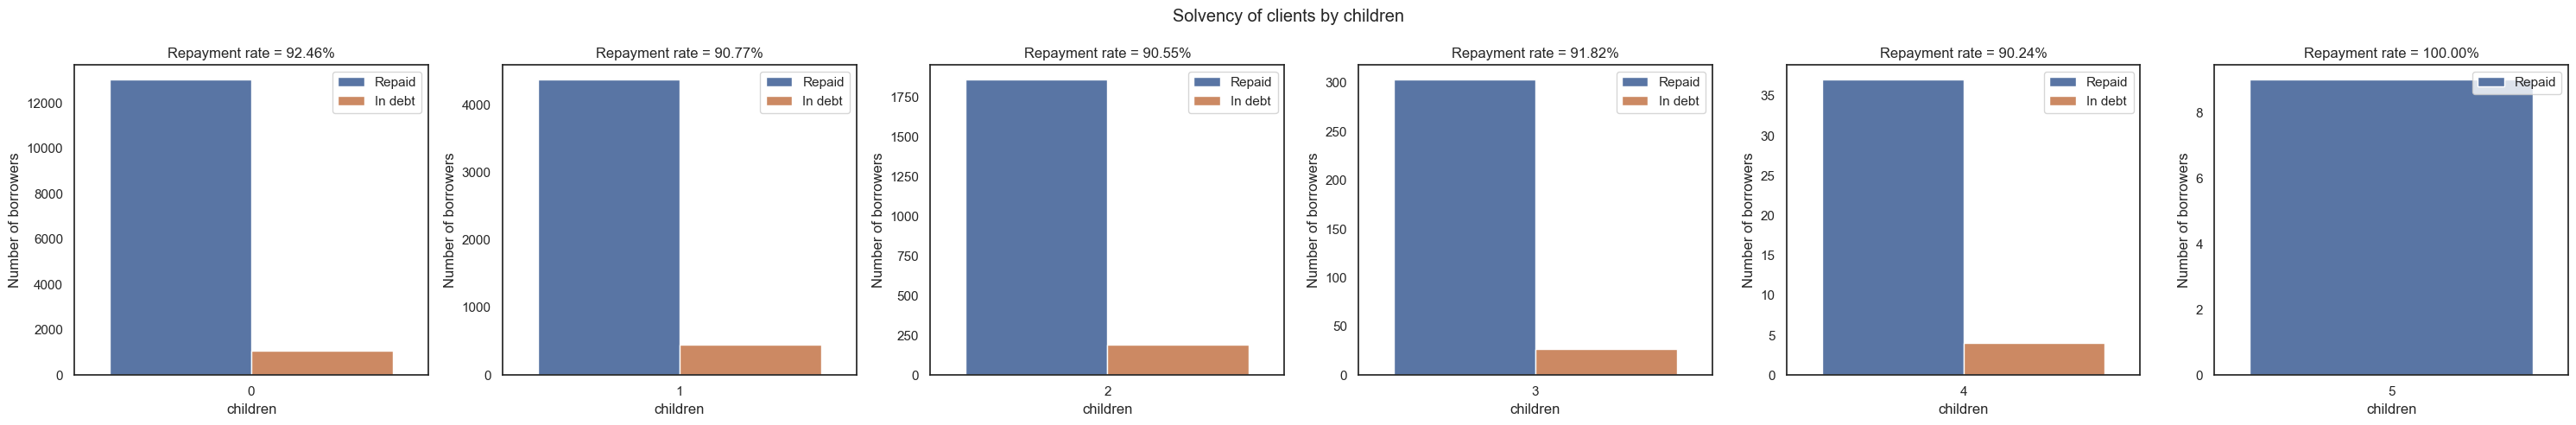

In [25]:
plot_solvency(feature="children")

Let's look at the data from the bank's point of view and use as a metric of loan repayment on time - "the proportion of people who have paid off a loan on time in a certain group" (`repay_ratio`). It can be seen that samples of borrowers with three or more children do not have many observations, especially for a group of people with five children. In other words, such samples are not representative enough and therefore it makes sense to compare samples with 0, 1 and 2 children only.

In [26]:
# Printing a table for subsamples of borrowers with 0, 1, 2 children
solvency_children.loc[solvency_children.index < 3].sort_values(
    by="repay_ratio", ascending=False
)

,total_borrowers,has_debt,no_debt,repay_ratio
children,,,,
0,14091,1063,13028,0.9246
1,4808,444,4364,0.9077
2,2052,194,1858,0.9055


Considering this grouping, it is obvious that with a larger number of children, the probability of repayment of the loan decreases: childless borrowers repay the loan on time in about 92.5% of cases, while for borrowers with a large number of children, this indicator is in the region of 90-91%. In other words, the repayment of the loan on time has an inverse relationship with the number of children of the borrower.

### Family status

In [27]:
# Computing the number of borrowers in each group by family status
data["family_status"].value_counts()

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

Let's apply the same strategy and look at the number of borrowers by marital status. Mostly loans are taken by people who are married (`женат / замужем`), and least of all by borrowers without official relations - widower/widow (`вдовец / вдова`) and divorced (`в разводе`). However, this does not mean that people who take out loans less often pay less on time.

In [28]:
solvency_family_status = show_solvency(feature="family_status", add_extra=True)
solvency_family_status

,family_status_eng,total_borrowers,has_debt,no_debt,repay_ratio
family_status,,,,,
Не женат / не замужем,not married,2796,273,2523,0.9024
в разводе,divorced,1189,84,1105,0.9294
вдовец / вдова,widower/widow,951,63,888,0.9338
гражданский брак,civil marriage,4134,385,3749,0.9069
женат / замужем,married,12261,927,11334,0.9244


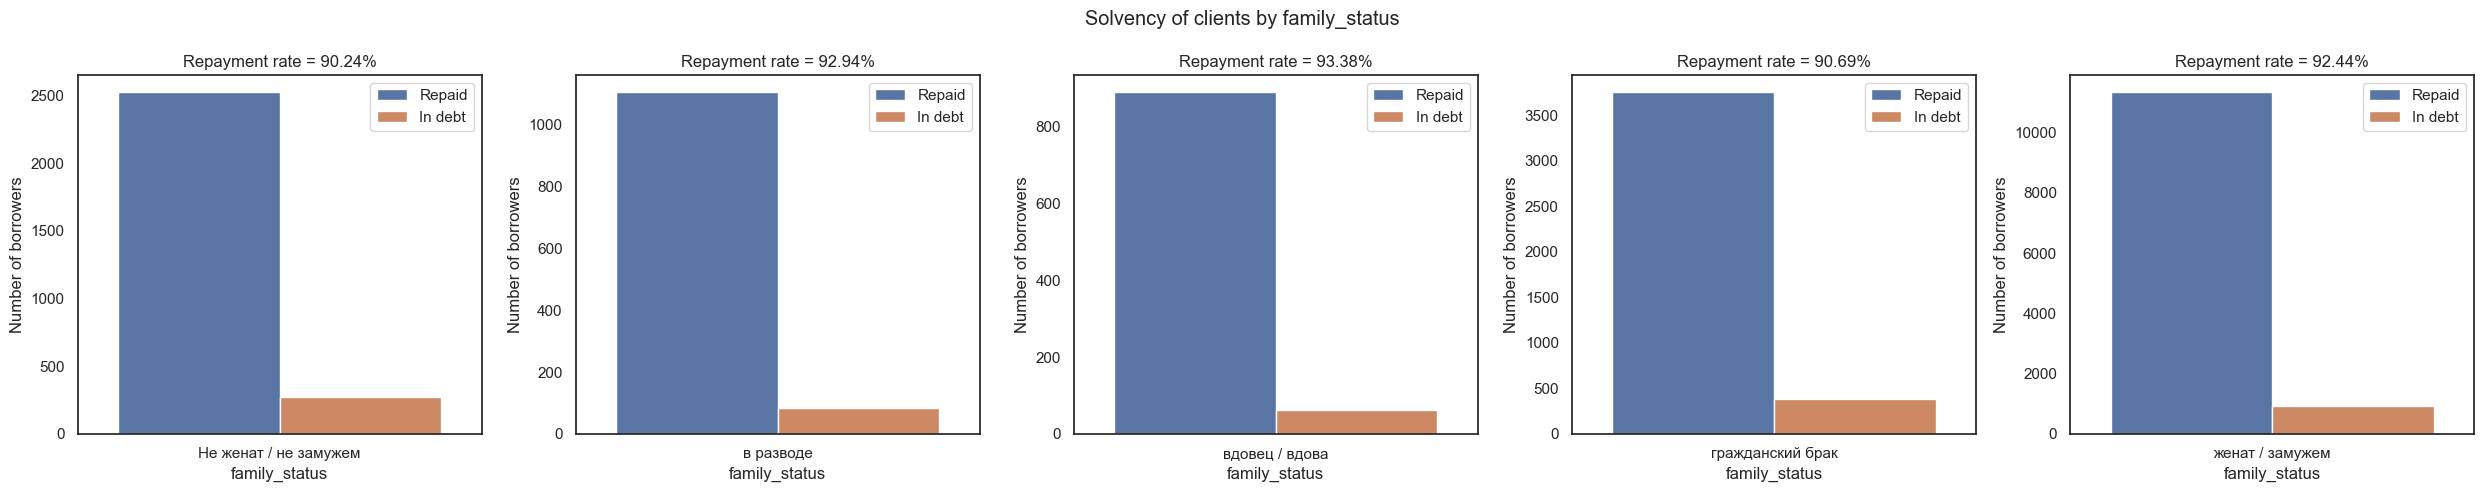

In [29]:
plot_solvency(feature="family_status")

As in the previous point, the number of observations in each sample has a fairly strong influence on the results of the study, since a smaller sample will absorb less information, thus distorting them. Therefore, in this case it makes sense to consider categories that include, say, more than 2000 people. Thus, we will exclude the categories of widower/widows (`вдовец / вдова`) and divorced (`в разводе`) from the analysis and consider others.

In [30]:
# Considering a subsample
solvency_family_status.loc[
    solvency_family_status["total_borrowers"] > 2000
].sort_values(by="repay_ratio", ascending=False)

,family_status_eng,total_borrowers,has_debt,no_debt,repay_ratio
family_status,,,,,
женат / замужем,married,12261,927,11334,0.9244
гражданский брак,civil marriage,4134,385,3749,0.9069
Не женат / не замужем,not married,2796,273,2523,0.9024


Now the dependence is more clearly traced: more family people are more responsible for timely repayment of debt, which is manifested in a high value of the share of refunds for such categories of borrowers. Thus, we have a direct relationship between the "formality" of family relations and the repayment of the loan on time.

### Total income

In [31]:
# Computing the number of borrowers in each group by income
data["total_income_category"].value_counts()

C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

In [32]:
solvency_income = show_solvency(feature="total_income_category", add_extra=True)
solvency_income

,income_range,total_borrowers,has_debt,no_debt,repay_ratio
total_income_category,,,,,
A,">1,000,000",25,2,23,0.9200
B,"200,001-1,000,000",5014,354,4660,0.9294
C,"50,001-200,000",15921,1353,14568,0.9150
D,"30,001-50,000",349,21,328,0.9398
E,"0-30,000",22,2,20,0.9091


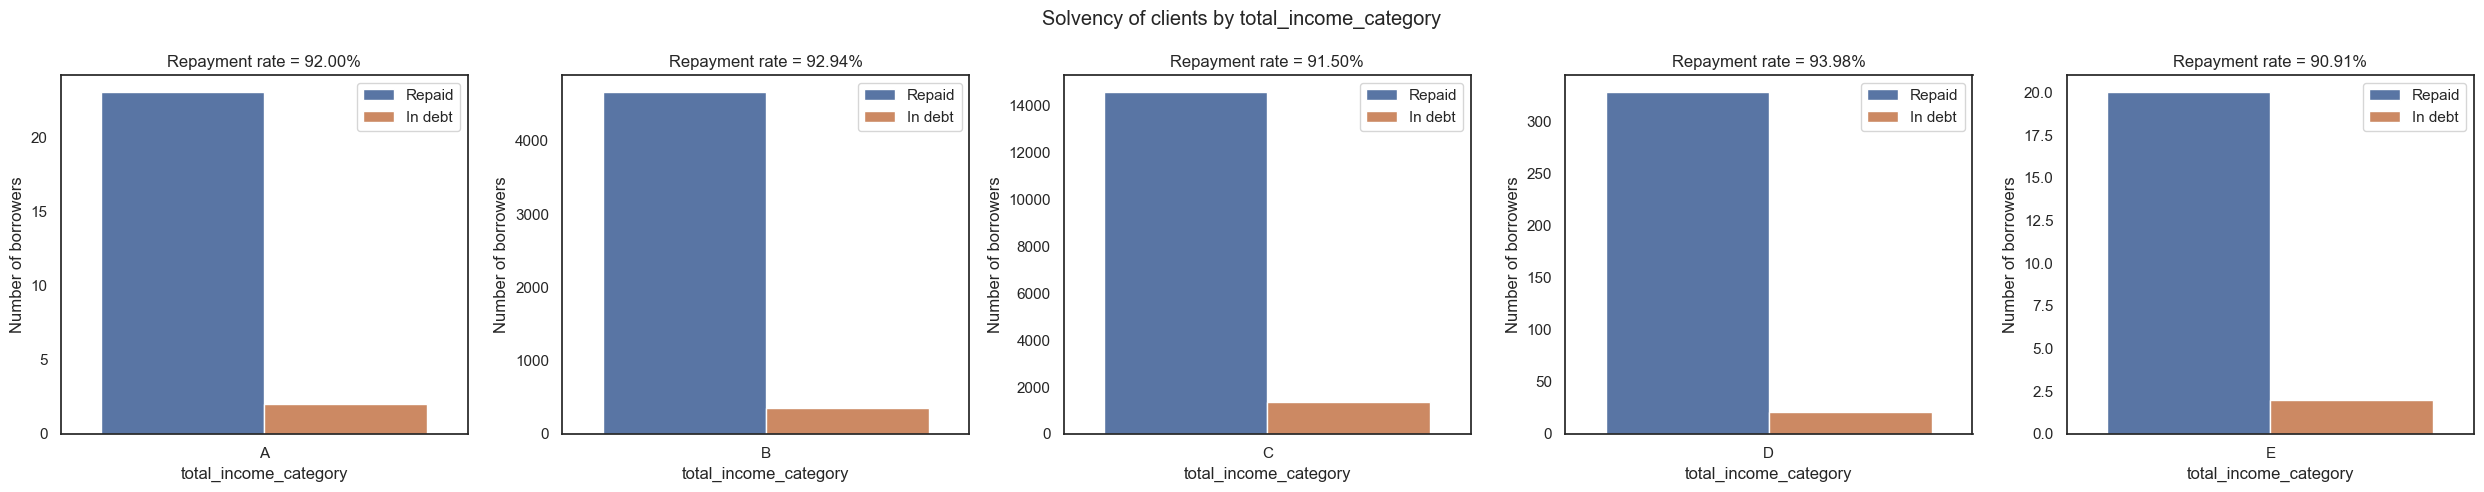

In [33]:
plot_solvency(feature="total_income_category")

The results show a similar situation: the number of borrowers of categories A, E and D is extremely small, which may affect the results of the study. Borrowers in these groups are underrepresented and it would be better to exclude them from the analysis and consider the remaining categories.

In [34]:
# Considering a subsample
solvency_income.loc[["B", "C"]].sort_values(by="repay_ratio", ascending=False)

,income_range,total_borrowers,has_debt,no_debt,repay_ratio
total_income_category,,,,,
B,"200,001-1,000,000",5014,354,4660,0.9294
C,"50,001-200,000",15921,1353,14568,0.9150


So, we can see that the higher the borrower's income category, the higher the probability of debt repayment, so we have a direct relationship between these two variables.

### Loan purpose

In [35]:
# Computing the number of borrowers in each group by loan purpose
data["purpose_category"].value_counts()

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

In [36]:
solvency_loan_purpose = show_solvency(feature="purpose_category", add_extra=True)
solvency_loan_purpose

,purpose_category_eng,total_borrowers,has_debt,no_debt,repay_ratio
purpose_category,,,,,
операции с автомобилем,car,4279,400,3879,0.9065
операции с недвижимостью,real estate,10751,780,9971,0.9274
получение образования,education,3988,369,3619,0.9075
проведение свадьбы,wedding,2313,183,2130,0.9209


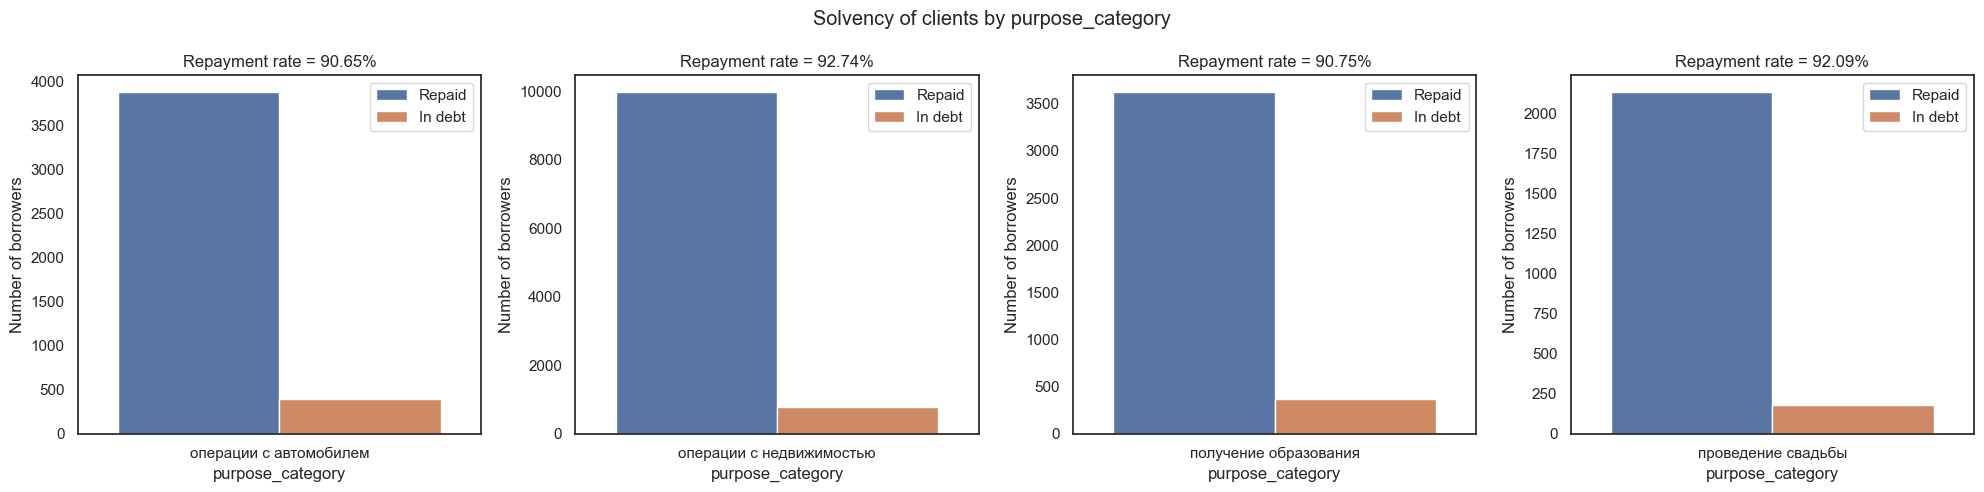

In [37]:
plot_solvency(feature="purpose_category")

Basically, loans are predominantly taken for real estate transactions and, moreover, borrowers of this group more often repay loans, so this direction of lending should be considered by bank analysts.

**Conclusion**

By considering separate solvency-affecting factors, we have managed to identify possible profit-enhacing channels that a bank can focus on.

## Conclusion

So, in this study, the statistics of the solvency of customers of a credit institution have been analyzed. To obtain the results, the data obtained was carefully preprocessed: duplicates were removed, abnormal and missing values were processed, and data categorization was carried out to simplify further data analysis.

Based on the results of the study, the following conclusion can be drawn. In order for the bank to increase its profits, the following groups of borrowers are the most profitable sources of funds for the bank:

* Childless;

* Married;

* People with salaries from 200,000 to 1,000,000 roubles;

* People taking out loans for real estate transactions.

In the future, it is recommendable that in the process of collecting data, a more careful approach to their processing is applied. In particular, it is advisable that missing values in the data be processed appropriately at the stage of sending them for analysis, or explanations be provided regarding the nature of their absence. The same applies to checking the correctness of the data format. This will lead to more efficient data analysis and the provision of more accurate recommendations and results.